# **Welcome! In this notebook, we'll solve Homework 4.16 together in Python.**

For this problem, we need to import many libraries - let's start there, and then dive into the math!

In [1]:
#Numpy, as always!
import numpy as np

#Matplotlib for plotting graphs, and line objects for visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D      

#Utility libraries
import random
import math

Let's begin by deciding what kind of figures we will rotate and reflect. For ease of visualization, let's start with four-sided figures! We'll keep track of these figures by storing the coordinates of each vertex in memory.

In [2]:
#Making data structures to store our points.
points = []

#For convenience, we also need a list of the X coordinates and Y coordinates.
#This makes graphing the figures much easier.
X = []
Y = []


#Create 4 points:
for _ in range(4):

        #Returns a random integer from -5 to 5, inclusive on both ends
        x = random.randint(-5,5)
        y = random.randint(-5,5)
        
        #Create each point as a matrix.
        points.append(np.matrix([[x],[y]]))
    
    
#When we graph, we'll draw lines between each consecutive pair of points.    
#So that our figure is closed, we add the first point to the end of this list as well!
points.append(points[0])
        

#Finally, for convenience, we also fill a list of only X coordinates and only Y coordinates
for i in range(len(points)):
    
    X.append(points[i][0,0])
    Y.append(points[i][1,0])

Great! We should have our points. Let's first graph our random figure, and gain some familiarity with our graphing methods.

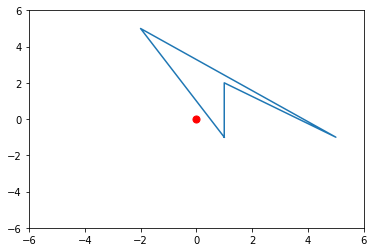

In [3]:
#First, we make a figure.
fig = plt.figure()

#Add a subplot, to which we add objects.
ax = fig.add_subplot(111)

#Create a line - here we must pass X and Y coordinates as separate lists!
line = Line2D(X, Y)
ax.add_line(line)

#Add the origin, as our transformations are relative to it.
plt.scatter(0, 0, color="red", s=50)

#Set bounds for rendering.
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

#Show this plot!
plt.show()

In the above figure, the origin is the large red point, and the figure is drawn with lines between our four random points in the plane. It looks just like we hoped! 

(If you run this code independently, it's fun to see what random figures Python will make; some are quite geometrically strange!)

***

Let's now make a method that will rotate our figure! Our idea is to use a rotation matrix to rotate each of our vertices in the points list, and then simply draw the lines between those new rotated vertices.

In [4]:
def rotatePoints(points, theta):
    
    newPoints = []

    #Define a rotation matrix from our definition.
    rotationMatrix = np.matrix([[math.cos(theta),-1 * math.sin(theta)], [math.sin(theta),math.cos(theta)]])  
    
    #Multiply each point by this matrix to rotate.
    for p in range(len(points)):
    
        #Add to newPoints.
        newPoints.append(np.matmul(rotationMatrix, points[p]))
        
    
    #Return our new points.
    return newPoints

We might as well try this out! Let's rotate by an even $\frac{\pi}{2}$ to start.

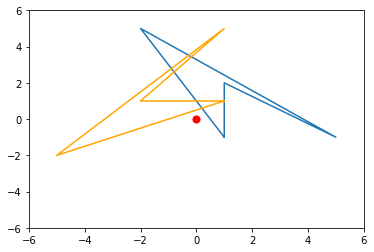

In [5]:
#Call our method!
newPoints = rotatePoints(points, math.pi / 2.0)

#We need to deconstruct into X and Y coordinates again.
newX = []
newY = []

for i in range(len(points)):
    
    newX.append(newPoints[i][0,0])
    newY.append(newPoints[i][1,0])
    
    
#Now, let's plot!
#This is mostly the same as above.
fig = plt.figure()
ax = fig.add_subplot(111)

#Plot the old figure in blue.
line = Line2D(X, Y)
ax.add_line(line)

#Plot the new figure in orange.
newLine = Line2D(newX, newY,color="orange")
ax.add_line(newLine)

plt.scatter(0, 0, color="red", s=50)

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

plt.show()

In the above plot, our old figure is blue while our rotated figure is orange. A perfect piroutte of $\frac{\pi}{2}$ radians about the origin!

***

Now, let's carry these same ideas into building a method to reflect across a line. We'll use a reflection matrix to accomplish this!

In [6]:
def reflectPoints(points, theta):
    
    newPoints = []

    #Define a reflection matrix from our definition.
    reflectionMatrix = np.matrix([[math.cos(theta),math.sin(theta)], [math.sin(theta),-1*math.cos(theta)]]) 
    
    #Multiply each point by this matrix to rotate.
    for p in range(len(points)):
    
        #Add to newPoints.
        newPoints.append(np.matmul(reflectionMatrix, points[p]))
        
    
    #Return our new points.
    return newPoints

In much the same way, we'll pick some nice theta value, and render our image to see what our code is doing!

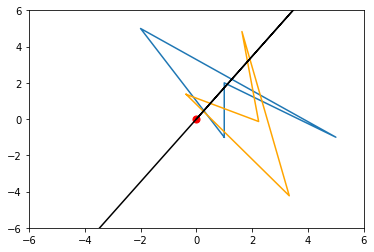

In [7]:
#Pick a theta.
theta = math.pi / 3.0

#Call our method!
newPoints = reflectPoints(points, theta)

#We need to deconstruct into X and Y coordinates.
newX = []
newY = []

for i in range(len(points)):
    
    newX.append(newPoints[i][0,0])
    newY.append(newPoints[i][1,0])
    
    
#Now, let's plot one more time!
fig = plt.figure()
ax = fig.add_subplot(111)

#Plot the old figure in blue.
line = Line2D(X, Y)
ax.add_line(line)

#Plot the new figure in orange.
newLine = Line2D(newX, newY,color="orange")
ax.add_line(newLine)

#Add one more line - the line we reflected over!
refLine = Line2D([0,5000*math.cos(theta),-5000*math.cos(theta)], [0,5000*math.sin(theta),-5000*math.sin(theta)],color="black")
ax.add_line(refLine)

plt.scatter(0, 0, color="red", s=50)

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

plt.show()

In the figure above, our old figure is blue, our reflected figure is orange, and our line of reflection is black!

***

This formally concludes this problem, as we have all of the pieces we need. However, this is fun! So let's celebrate by doing some crazy compositions of reflections and rotations on a more exciting figure! How about $8$ sides?

In [8]:
#Store our points
points = []
X = []
Y = []

#Create 8 points:
for _ in range(8):

        #Returns a random integer from -5 to 5, inclusive on both ends
        x = random.randint(-5,5)
        y = random.randint(-5,5)
        
        #Create each point as a matrix.
        points.append(np.matrix([[x],[y]]))
    
    
#Extra point for graphing closed figure
points.append(points[0])

#Convenient X and Y lists
for i in range(len(points)):
    
    X.append(points[i][0,0])
    Y.append(points[i][1,0])

Just because we can, we'll reflect, then rotate, then reflect, then rotate, then reflect, by some of my favorite numbers!

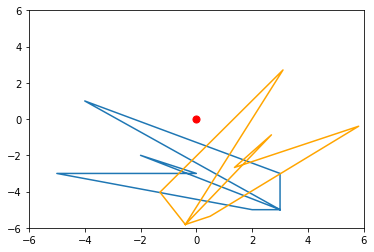

In [9]:
#Call our methods!
newPoints = reflectPoints(rotatePoints(reflectPoints(rotatePoints(reflectPoints(points, math.pi / 1.5), math.pi / 4.0), 7), 42), 100)

#We need to deconstruct into X and Y coordinates one more time.
newX = []
newY = []

for i in range(len(points)):
    
    newX.append(newPoints[i][0,0])
    newY.append(newPoints[i][1,0])
    
    
#Let's plot this!
fig = plt.figure()
ax = fig.add_subplot(111)

#Plot the old figure in blue.
line = Line2D(X, Y)
ax.add_line(line)

#Plot the new figure in orange.
newLine = Line2D(newX, newY,color="orange")
ax.add_line(newLine)

plt.scatter(0, 0, color="red", s=50)

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

plt.show()

Depending on the random figure, this can look great, or a bit messy!

***

Thanks for reading this week's problem, and as always, feel free to email me with any questions!

-Charles